## Time to get you hands dirty! Open a jupyter notebook and code it up! 
#### Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 

**Food for thought:** And what if you had $N$ doors to choose from and the presenter opens $p\leq N$ of them? Study how the probability of winning changes as a function of $p$ and $N$.


---


# Monty Hall problem

## Classical Monty Hall
Imagine a game show with 3 doors. Behind two of them are goats, and behind the third is a luxury car. You initially choose one of the doors. Then, the host, who knows what is behind each door, opens one of the remaining doors to reveal a goat. At this point, you're given the option to either stick with your original choice or switch to the other unopened door. The question is: Is it better to switch, or is it just as good to stay with your original choice?

In [ ]:
import random

def MontyHall():
    doors = [0, 0, 0]
    car_pos = random.randint(0, 2)
    doors[car_pos] = 1

    first_choice = random.randint(0, 2)
    win = -1
    if doors[first_choice]:
        win = 1

    change_idea = random.randint(0, 1)
    if change_idea: 
        win *= -1 
    # we are sure that this is an Aut-Aut situation, because the host always opens a door with a goat behind it
    # and so if you choose the right door at first, changing idea makes you lose, and vice versa
    
    return win, change_idea


## General Monty Hall
The problem is the same but now the doors are $N$ and the possible choices are $p$.

In [ ]:
import numpy as np

def general_MontyHall(n_doors=3, n_open_doors=1):
    result = {
        "initial_choice": None,
        "steps": [],
        "final_choice": None
    }
    
    doors = np.zeros(n_doors)
    car_pos = random.randint(0, n_doors - 1)
    doors[car_pos] = 1
    changes = [random.randint(0, 1) for _ in range(n_open_doors)]
    n_changes = np.sum(changes)

    choice_pos = random.randint(0, n_doors - 1)
    choice = doors[choice_pos]

    result["initial_choice"] = {"position": choice_pos, "value": choice}

    for change in changes: 
        open_door = 1
        while open_door:
            open_door_pos = random.randint(0, len(doors) - 1)
            if open_door_pos != choice_pos:
                open_door = doors[open_door_pos]
        # the while loop ensures that the opened door is not the chosen one, and that it has a goat behind it

        doors = np.delete(doors, open_door_pos)
        # the opened door is removed from the game
        
        # Update choice_pos if needed
        if open_door_pos < choice_pos:
            choice_pos -= 1

        if change:
            c = random.randint(0, len(doors) - 1)
            while c == choice_pos:
                c = random.randint(0, len(doors) - 1)            
            choice_pos = c
            # the while loope ensures that the new choice is different from the previous one

        choice = doors[choice_pos]

        result["steps"].append({
            "position": choice_pos,
            "value": choice,
            "change_made": bool(change)
        })
    
    result["final_choice"] = {"position": choice_pos, "value": choice, "n_changes": n_changes}
    
    return result


## Plot the results

### Classical Monty Hall
We want to study the classical Monty Hall problem and at the same time verify that the two algorithm showed before converge to the same result in this limit. 

Classical Monty Hall Simulation Results:


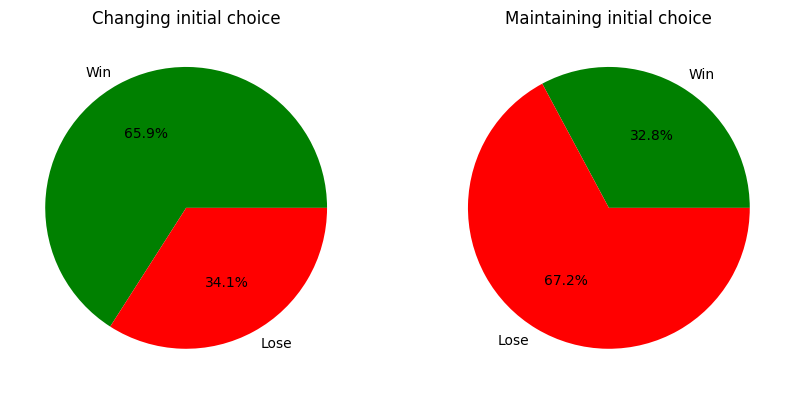

Generalized Monty Hall Simulation Results (3 doors, 1 opened):


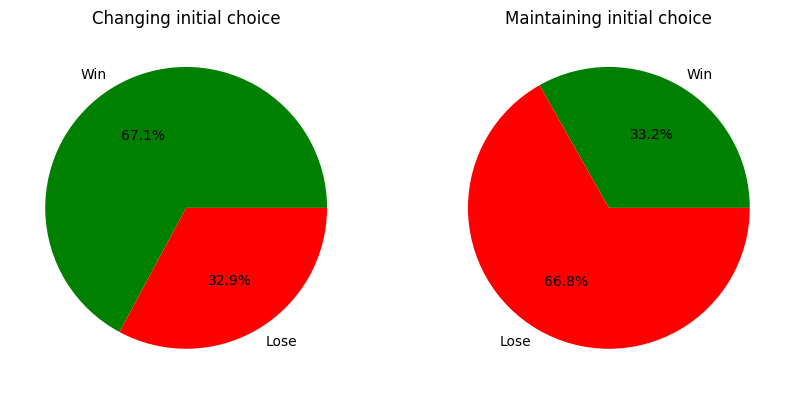

In [6]:
import matplotlib.pyplot as plt

def plot_classicalMontyHall(n_trials, generator):
    results_change = []
    results_no_change = []

    for _ in range(n_trials):
        win = None
        change_idea = None
        result = generator()  

        if generator == general_MontyHall:
            win = 1 if result["final_choice"]["value"] == 1 else -1
            change_idea = 0 if result["final_choice"]["n_changes"] == 0 else 1
        
        elif generator == MontyHall:
            win, change_idea = result  

        
        if change_idea:
            results_change.append(win)
        else:
            results_no_change.append(win)

    # Contiamo le vittorie e sconfitte
    win_count_change = results_change.count(1)
    lose_count_change = results_change.count(-1)

    win_count_no_change = results_no_change.count(1)
    lose_count_no_change = results_no_change.count(-1)

    # Creazione dei grafici a torta
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].pie([win_count_change, lose_count_change], labels=["Win", "Lose"], autopct='%1.1f%%', colors=["green", "red"])
    axs[0].set_title("Changing initial choice")

    axs[1].pie([win_count_no_change, lose_count_no_change], labels=["Win", "Lose"], autopct='%1.1f%%', colors=["green", "red"])
    axs[1].set_title("Maintaining initial choice")

    plt.show()

print("Classical Monty Hall Simulation Results:")
plot_classicalMontyHall(10000, MontyHall)
print("Generalized Monty Hall Simulation Results (3 doors, 1 opened):")
plot_classicalMontyHall(10000, general_MontyHall)



The results respect the theoretical expectations, infact for this problem we are able to compute mathematically the winning probabilities:
- At the beginning, the probability of choosing the car is $\frac{1}{3}$, while the probability of choosing a goat is $\frac{2}{3}$.
- After the host opens a door with a goat behind, you have two options:
    - If at first you chose the goat the probability to find the car switching is $1$. So the probability to win the car is: 
    $$
    p(win|switch) = \frac{2}{3} \cdot 1 = \frac{2}{3}
    $$ 
    - If at first you chose the car the probability to find the car switching is $0$, while if you stay with your first choice the probability to win the car is $1$. So the probability to win the car is:
    $$
    p(win|stay) = \frac{1}{3} \cdot 1 = \frac{1}{3}
    $$
- Summing up the two contributions we get that the probability to win the car:
    $$
    p(win) = p(win|switch) + p(win|stay) = \frac{2}{3} + \frac{1}{3} = 1
    $$

Behind this game there is the **Bayes theorem**. The theorem states that the conditional probability of an event $A$ given an event $B$ is given by:
$$
p(A|B) = \frac{p(B|A) \cdot p(A)}{P(B)}
$$  

### General Monty Hall

We know that the general Monty hall problem have to follow the following equation: 
$$
f(N, p) = \frac{1}{N}\frac{N-1}{N-p-1}
$$
were $f(N,p)$ is the probability of with $N$ doors and $p$ doors.

We can plot the results changing $N$ and $p$ to verify this rule.

Processing N values: 100%|██████████| 22/22 [02:09<00:00,  5.86s/it]


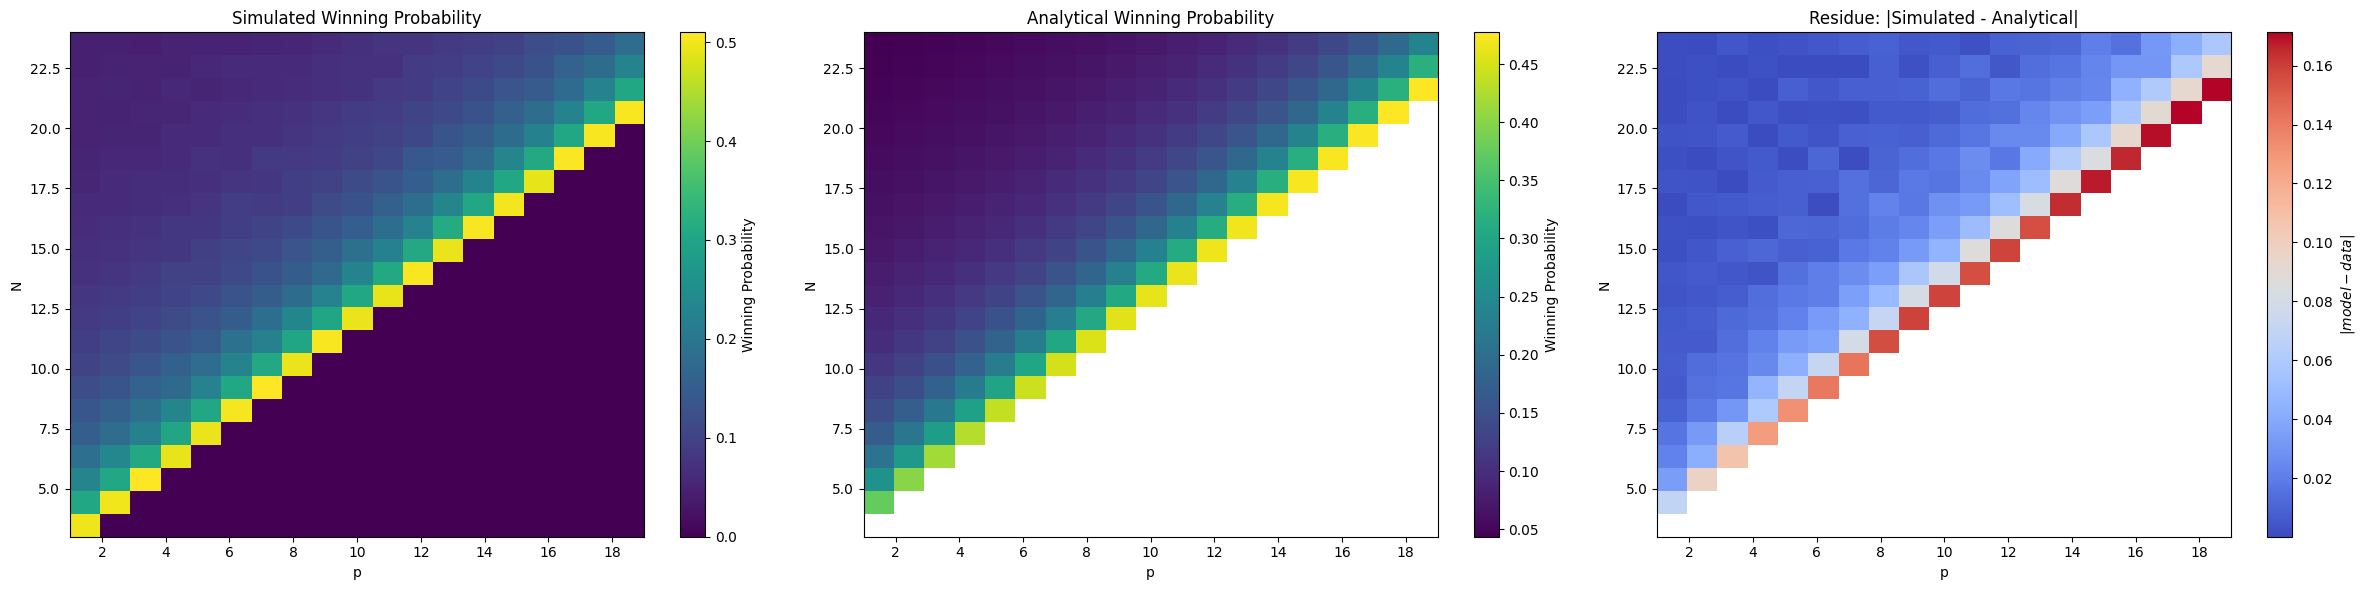

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

# Parameters
N_extreme = 25
p_extreme = 20
n_trials = 10000

# Initialize arrays for the simulation
N_values = np.arange(3, N_extreme)
P_values = np.arange(1, p_extreme)
results = np.zeros((len(N_values), len(P_values)))

# Simulation
for i, N in enumerate(tqdm(N_values, desc="Processing N values")):
    for j, p in enumerate(P_values):
        if p > N - 2:
            continue
        results[i, j] = np.mean([general_MontyHall(N, p)["final_choice"]["value"] for _ in range(n_trials)])

# Generate analytical function
X, Y = np.meshgrid(N_values, P_values, indexing="ij")
F = np.full_like(results, np.nan) # Initialize with NaNs an array with same dimension of results
valid_indices = Y < X - 2 # Avoid invalid cases
F[valid_indices] = (1 / X[valid_indices]) * ((X[valid_indices] - 1) / (X[valid_indices] - Y[valid_indices] - 1))

# Calculate the normalized residue
residue = np.full_like(results, np.nan)
residue[valid_indices] = np.abs(results[valid_indices] - F[valid_indices])

# Plotting the results
plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
plt.imshow(results, aspect='auto', origin='lower', 
           extent=[P_values[0], P_values[-1], N_values[0], N_values[-1]],
           cmap='viridis')
plt.colorbar(label='Winning Probability')
plt.xlabel("p")
plt.ylabel("N")
plt.title('Simulated Winning Probability')

plt.subplot(1, 3, 2)
plt.imshow(F, aspect='auto', origin='lower', 
           extent=[P_values[0], P_values[-1], N_values[0], N_values[-1]],
           cmap='viridis')
plt.colorbar(label='Winning Probability')
plt.xlabel("p")
plt.ylabel("N")
plt.title('Analytical Winning Probability')

plt.subplot(1, 3, 3)
plt.imshow(residue, aspect='auto', origin='lower', 
           extent=[P_values[0], P_values[-1], N_values[0], N_values[-1]],
           cmap='coolwarm')
plt.colorbar(label=r"$|model - data|$")
plt.xlabel("p")
plt.ylabel("N")
plt.title('Residue: |Simulated - Analytical|')

plt.tight_layout()
plt.show()

We plot only values admitted, so with $p<N-2$